In [177]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [178]:
df = pd.read_csv('Fish.csv',index_col=None)

In [179]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [180]:
data1 = df['Species'].to_numpy()
data1 = data1.reshape(-1,1)
encoder = OrdinalEncoder()
result1 = encoder.fit_transform(data1)
df['Species'] = result1

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0.0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0.0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0.0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0.0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0.0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [181]:
y = np.array(df['Weight'])
df_features = df.drop(['Weight'],axis=1)
dataset = df_features.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)


In [182]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)
# data = load_diabetes()
# X = data.data
# y = data.target

In [183]:
reg = LinearRegression().fit(X_train,y_train)
predicted = reg.predict(X_test)

## Testing with scikitlearn

In [184]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predicted)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predicted))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predicted)))

r2 socre is 0.9034878699241473
mean_sqrd_error is== 13727.816553006523
root_mean_squared error of is== 117.1657652772623


In [185]:
X_train

array([[3.33333333e-01, 1.45631068e-01, 1.41818182e-01, 1.41891892e-01,
        1.56141626e-01, 2.23128187e-01],
       [5.00000000e-01, 6.93203883e-01, 6.83636364e-01, 6.73986486e-01,
        3.46796010e-01, 5.59866412e-01],
       [0.00000000e+00, 3.18446602e-01, 3.29090909e-01, 3.76689189e-01,
        6.20049815e-01, 5.33705414e-01],
       [3.33333333e-01, 2.42718447e-01, 2.47272727e-01, 2.48310811e-01,
        2.46570771e-01, 3.39852271e-01],
       [6.66666667e-01, 2.52427184e-01, 2.56363636e-01, 2.78716216e-01,
        3.01593355e-01, 4.01952673e-01],
       [6.66666667e-01, 2.31067961e-01, 2.29090909e-01, 2.51689189e-01,
        2.46844871e-01, 3.22822800e-01],
       [1.66666667e-01, 2.38834951e-01, 2.38181818e-01, 2.58445946e-01,
        4.62656863e-01, 3.02182841e-01],
       [3.33333333e-01, 5.65048544e-01, 5.56363636e-01, 5.48986486e-01,
        6.23237716e-01, 9.33160832e-01],
       [0.00000000e+00, 4.75728155e-01, 4.83636364e-01, 5.37162162e-01,
        8.57444197e-01, 

In [186]:
X_train_num = np.dot(X_train,100).astype(int)
X_test_num = np.dot(X_test,100).astype(int)
y_train_num = y_train
y_test_num = y_test

In [187]:
X_train_den = np.full(X_train.shape, 100) 
X_test_den = np.full(X_test.shape, 100) 
y_train_den = np.ones(len(y_train))
y_test_den = np.ones(len(y_test))
X_train_den

array([[100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 10

In [188]:
reg = LinearRegression().fit(X_train_num,y_train)
predicted_num = reg.predict(X_test_num)

In [189]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predicted_num)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predicted_num))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predicted_num)))

r2 socre is 0.9053317459339338
mean_sqrd_error is== 13465.544944360583
root_mean_squared error of is== 116.041134708174


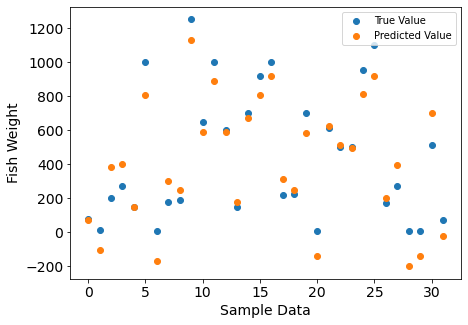

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
x = np.arange(len(y_test))
plt.scatter(x, y_test,label="True Value")
plt.scatter(x, predicted_num,label="Predicted Value")
plt.xlabel('Sample Data', size=14)
plt.ylabel('Fish Weight', size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.savefig('Fish.pdf',bbox_inches='tight')
plt.show()

In [191]:
#shortening numners 
def shorter(c,d):
    c = int(c)
    d = int(d)
    if(c<0):
        n = c*(-1)
        if(len(str(n))==len(str(d)) and len(str(n))>3):      
            a = f"{n:.0f}"
            a = str(a[:-3])
            a = int(a)*(-1)
            b = f"{d:.0f}"
            b = str(b[:-3])
            b = int(b)
        elif(len(str(n))>=3 and len(str(d))>=3):
            a = f"{n:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-2
            else:
                s = len(str(b))-2
            a = int(a[:-s])
            b = int(b[:-s])
            a = a*-1 
        else:
            a = int(n*-1)
            b = d
    elif(len(str(c))==len(str(d)) and len(str(c))>3):      
            a = f"{c:.0f}"
            a = str(a[:-2])
            a = int(a)
            b = f"{d:.0f}"
            b = str(b[:-2])
            b = int(b)
#     elif(len(str(c))==1 and len(str(d))>3):
#         a = int(0)
#         b = int(1)
    elif(len(str(c))>3 and len(str(d))>3):
            a = f"{c:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-3
            else:
                s = len(str(b))-3
            a = int(a[:-s])
            b = int(b[:-s])
    else:
        a = c
        b = d
    return a,b

#condensed function multiply and add matrix with numerator and denominator one row at a time
# Python Program to find the L.C.M. of two input number
from math import gcd
def compute_lcm(x, y):
   # choose the greater number 
    if (x > y):
        greater = x
    else:
        greater = y
    while(True):
        if(x==0):
            lcm = y
            break
        elif(y==0):
            lcm = x
            break
        elif((greater % x == 0) and (greater % y == 0)):
            lcm = greater
            break
        greater += 1
    return lcm
 
#Subtracting 2 numbers of the form a/b -c/d
def subtraction(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) - ((den/d)*c)
    return num,den

#adding array of elements of the form x/y
def add_array(a_num,a_den):
    #will work for an int array of any length
    lcm = 1;sum1 =0
    for i in a_den:
        lcm = int(lcm*i/gcd(lcm, i))
#     print("lcm is ",lcm)
    for i in range(len(a_num)):
        sum1 = sum1 + (a_num[i]*(a_den[i]/lcm))
#         print(a_num[i],a_den[i],lcm)      
#     print("sum is ", sum1)
    return sum1,lcm

#adding two numbers of the form a/b + c/d
def addition(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) + ((den/d)*c)
    return int(num),int(den)

#multiplying two arrays of fraction and adding them  for row by column multiplication
def multiply(a_num,a_den,b_num, b_den):
#     print(type(a_num))
    z_num = np.zeros(len(a_num)).astype(int)
    z_den = np.zeros(len(a_den)).astype(int)
#     print("printing anum,aden,bnum,bden",a_num,a_den,b_num,b_den)                                   
    for i in range(len(a_num)):
        z_num[i]=(a_num[i]*b_num[i])     
        z_den[i]=(a_den[i]*b_den[i])
    
    x = z_num.tolist()
    y = z_den.tolist()
#     print("Printing z_num and z_den", x , y )
    num,den = add_array(x,y)
#     print("multiplication results is",num,den) 
    return num,den

#claculate y_hat =wx+b | x is in the form a single array and w is in the form of array too
# need toc hange w into wnum and wden
def y_hat(w_num,w_den,x_num,x_den,b):
    y_hat_num = np.zeros(x_num.shape[0]).astype(int)
    y_hat_den = np.zeros(x_den.shape[0]).astype(int)
    #multiplying w and x
    for i in range(x_num.shape[0]):
#         print("iteration number ",i)
        x_n = x_num[i] 
        x_d = x_den[i] 
#         print(x_n,x_d,w_num,w_den)
        temp_n, temp_d = multiply(x_n,x_d,w_num,w_den)
#         print("printing temporary values",temp_n,temp_d)
        y_hat_num[i],y_hat_den[i] = addition( temp_n, temp_d,b[0],b[1])
        y_hat_num[i],y_hat_den[i] = shorter(y_hat_num[i],y_hat_den[i])   #trying this
        
    print("y_hat values for this iterationsa are",y_hat_num,y_hat_den)
    return y_hat_num,y_hat_den

#calculating mean square values
def mse(y_hat_num,y_hat_den,y_num,y_den,n):
    num=0;den =0
    for i in range(len(y_hat_num)):
        num1,den1=subtraction(y_num[i],y_den[i],y_hat_num[i],y_hat_den[i])
        num1 = num1*num1
        den1 = den1*den1
        num,den = addition(num,den,num1,den1)
    den = den * n
#     print(num,den)
    return num,den

#calculating subtraction of Y_hat Y
def y_hat_substraction(y_hat_num,y_hat_den,y_num,y_den):
    y_diff =np.zeros((y_hat_num.shape[0],2))
    for i in range(len(y_hat_num)):
        y_diff[i][0],y_diff[i][1] = subtraction(y_hat_num[i],y_hat_den[i], y_num[i], y_den[i])
    return y_diff

#getting delta w with respect 
#need change - can call the subtraction of y_hat from y
def delta_w(y_hat_diff,x_num, x_den, n):
    del_w_num = np.zeros(x_num.shape[1])
    del_w_den = np.zeros(x_num.shape[1])
    
    x_num = x_num.T
    x_den = x_den.T
    y_num = y_hat_diff[:,0]
    y_den = y_hat_diff[:,1]
    
#     print("getting delta w num and den ")
    for i in range(len(del_w_num)):
#         print("printing X",len(x_num[i]))
#         print("printing X",len(x_den[i]))
#         print("printing y diff",len( y_num))
#         print("printing y diff", len(y_den))
        del_w_num[i],del_w_den[i] = multiply(x_num[i],x_den[i],y_num,y_den)
        del_w_num[i] = del_w_num[i]*2
        del_w_den[i] = del_w_den[i]*n
#         if(del_w_num[i]>= del_w_den[i] or del_w_num[i]<=del_w_den[i]):
#             del_w_num[i]= int(del_w_num[i]/del_w_den[i])
#             del_w_den[i] = 1
    print("delta w num and den are",del_w_num,del_w_den)
    return del_w_num,del_w_den


#getting delta b 
def delta_b(y_hat_diff):

#     print(type(y_hat_diff))
    yh_num = np.array(y_hat_diff[:,0]).astype(int)
    yh_den = np.array(y_hat_diff[:,1]).astype(int)
#     print(type(yh_num[0]))
#     print(type(yh_den[0]))    
#     print("printing yh_num",yh_num)
#     print("printing yh_den",yh_den)
    num,den = add_array(yh_num, yh_den)
    num = num*2
    den = den*len(yh_num)
#     print("printing delta_b", num,den)
    return num,den

# get new weights and biases
def get_new_params(lr, dw_num,dw_den,db_num,db_den,w_num,w_den,b_num,b_den):
    
    for i in range(len(dw_num)):
        dw_num[i]= dw_num[i]*lr[0]
        dw_den[i]= dw_den[i]*lr[1]
   
    btemp_num = lr[0] * db_num
    btemp_den = lr[1] * db_den 

    for i in range(len(dw_num)):
        dw_num[i],dw_den[i] = subtraction(w_num[i],w_den[i],dw_num[i],dw_den[i]) 
    
    db_num,db_den = subtraction(b_num,b_den,btemp_num,btemp_den)
#     print("printing new weight parameters", dw_num,dw_den)
#     print("printing new bias parameters",db_num,db_den)
    return  dw_num,dw_den,db_num,db_den

#normalize weights and bias
def normalize_weights_bias(wnum,wden, bnum,bden):
    wn_num = np.zeros(6) 
    wn_den = np.zeros(6)
    for i in range (len(wf_num)):
        wn_num[i] = int((wnum[i]/wden[i])*1)
        wn_den[i] = 1
    bnum = int(bnum/bden * 1)
    bden = 1
    
#     print("Normalizing weights and biases",wn_num,wn_den, bnum, bden)
    return wn_num, wn_den,bnum, bden

In [192]:
# X_train_num = X_train_num.astype(int)
# X_test_num = X_test_num.astype(int)
# y_train_num = y_train
# y_test_num = y_test

# X_train_num

In [201]:
wnum = np.ones(6)
wden = np.ones(6)
b =[1,1]
bnum =1
bden =1
lr = [1,10]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
#     print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)

    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
    y_diff

    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))

    # get delta_b
    delb_num, delb_den = delta_b(y_diff)

    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
    print(i)
print(wnum,wden, bnum, bden)

y_hat values for this iterationsa are [212 443 315 262 313 292 263 453 407 433 194 268 255 263 258 387 262 236
 424 356 384 282 483 409 202 469 292 336 414 456 501 316 262 359 270 375
 294 426 239 304 259 417 291 433 407 402 417 238 291 550 311 206 381 309
 451 197 181 462 336 201 465 199 232 283 298 361 343 416 439 317 226 239
 234 452 303 338 302 307 452 400 268 255 550 595 263 348 418 362 491 430
 327 375 279 136 462 352 392 221 401 326 327 209 456 326 264 389 400 204
 357 270 201 310 354 367 311 286 448 261 198 459 233 387 314 316 368 273
 331] [100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 10

y_hat values for this iterationsa are [21907 57005 44727 30225 32909 29318 32961 62614 59987 55499  9769 31551
 31831 24467 29719 56397 30277 25793 57777 51248 50975 36230 67534 60151
 11125 65178 29342 48314 52096 68040 66961 39461 32970 51877 31667 45767
 41060 57645 29057 31352 29916 61593 29169 59736 59953 59242 56418 26229
 29289 74772 38524 11803 46681 32275 62182 22095 16638 69008 42755 10990
 64260 22437 16279 33826 36437 41019 49247 56173 60058 33453 18284 26422
 25757 67254 31045 48402 31198 40475 62427 53715 31345 29080 74772 82641
 30470 49988 56797 52382 56775 55070 46479 54435 27193  9195 60346 50876
 48718 26091 47703 41077 35279 12198 51230 34962 30619 56719 41362 11361
 42995 25602 10928 43704 39726 44697 38524 34231 61979 30172 19599 63614
 16332 56565 41624 39207 53310 32090 42128] [100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 1

y_hat values for this iterationsa are [15493 60913 45505 26249 28586 24021 29952 67896 65085 59006  -165 27989
 28584 17750 25587 60541 26252 20578 61737 53918 52925 34164 74412 65320
   130 71383 24022 50217 54529 75365 73799 38203 29968 54713 28148 46279
 40862 61662 24976 26623 25839 67145 23771 64125 65047 64205 60047 21048
 23924 84103 37019  1022 47483 27843 67427 16004  8717 76681 42511   -82
 70111 16505  6768 30925 34319 39032 51333 59719 64783 29361  9770 21373
 20424 74540 26255 50374 26499 39620 67755 56495 27721 24755 84103 94215
 26577 52286 60492 55428 58248 58295 47835 58016 21282   -89 65276 53373
 49991 21205 47726 40300 31653  1547 51005 31248 26753 60894 38424   442
 42630 19207   -12 44206 37309 44842 37019 31487 67206 26225 12540 69215
  6866 60770 41115 37859 56522 28601 41527] [100 100 100 100 100 100 100 100 100 100  10 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 1

y_hat values for this iterationsa are [ 11401  63480  45552  23670  25922  20776  27766  71000  67763  61343
   -858  25683  26285  13623  22914  62652  23624  17246  64053  55125
  53982  32561  78554  68046   -652  75113  20753  50988  56167  79380
  78197  37319  27792  56021  25867  46709  40330  64032  22150  23721
  23200  70098  20444  66672  67725  66828  62173  17711  20619  90105
  35988   -549  48098  25136  70535  11941   3699  80929  42271   -679
  73588  12559   1029  29022  32909  37809  52183  61788  67598  26861
   4532  18142  16993  78587  23321  51195  23644  38760  70920  58079
  25371  21957  90105 101598  24055  53263  62649  56887  59308  60408
  48254  59783  17659   -725  68496  54460  50863  17900  47766  39715
  29424   -488  50994  28963  24242  63003  36774   -616  42504  15275
   -681  44084  35799  45037  35988  29690  70324  23681   8059  72526
   1163  62926  40473  36908  58047  26306  41015] [100 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  8177  65481  44811  21538  23873  18349  25627  72834  68844  63185
  -1347  23749  24105  10564  20699  63384  21419  14608  65360  55225
  54388  30831  81219  69177  -1120  77488  18295  50804  57482  81361
  81509  36412  25656  56177  23961  47107  39231  65447  19583  21531
  21007  71371  17933  68054  68805  67909  63390  15012  18121  94692
  34993  -1006  48644  23097  72419   8496    -17  83123  41855  -1153
  75746   9231   -300  27384  31637  36769  52018  62961  69328  24969
    680  15560  14212  80702  21128  51081  21520  37546  72848  58871
  23412  19654  94692 107135  21967  53193  63860  57181  60082  62008
  47829  60269  14965  -1208  70981  54427  51522  15022  47668  39032
  27686   -938  50950  27190  22154  63704  35657  -1080  42446  12355
  -1150  43243  34533  45215  34993  28157  72223  21593   4567  74520
   -282  63693  39419  35954  58342  24347  40306] [100 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  5857  66499  43985  19914  22445  16671  23935  73784  69186  64113
  -1668  22269  22393   8480  19035  63482  19757  12650  65972  54917
  54412  29407  82685  69541  -1427  78768  16599  50334  58060  82279
  83383  35580  23976  55915  22487  47117  38159  66093  17619  20005
  19359  71833  16203  68750  69147  68251  63926  13030  16405  97346
  34097  -1306  48742  21671  73391   5972   -291  84165  41331  -1464
  76878   6777   -565  26080  30569  35997  51552  63465  70188  23631
   -191  13648  12190  81682  19590  50637  20042  36458  73852  59147
  21904  17926  97346 110421  20375  52781  64406  57005  60610  62794
  47183  60213  13117  -1543  72317  54057  51712  12856  47492  38338
  26460  -1235  50976  25934  20562  63784  34957  -1385  42190  10357
  -1459  42339  33611  45111  34097  26909  73221  20001   2077  75572
   -546  63821  38433  35078  58166  22839  39618] [100 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  3981  67743  43533  18694  21417  15403  22651  75012  69838  65277
  -1940  21193  21093   6828  17783  63894  18505  11110  66880  54945
  54760  28379  84393  70209  -1687  80300  15315  50218  58888  83475
  85443  35112  22708  55991  21411  47417  37467  67017  16079  18881
  18123  72597  14887  69754  69799  68903  64754  11474  15105 100126
  33565  -1560  49122  20643  74635   3904   -518  85473  41151  -1727
  78266   4773   -785  25164  29877  35593  51436  64261  71320  22683
   -404  12156  10602  82926  18450  50537  18966  35750  75128  59735
  20796  16610 100126 113809  19187  52713  65250  57161  61438  63830
  46891  60481  11689  -1829  73865  54037  52188  11124  47648  37998
  25624  -1485  51340  25066  19374  64180  34617  -1643  42250   8785
  -1721  41807  33063  45315  33565  26041  74497  18813     41  76896
   -764  64265  37821  34562  58322  21731  39294] [100 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  2341  69028  43228  17669  20572  14333  21566  76282  70568  66487
  -2184  20303  19993   5398  16728  64399  17450   9785  67850  55090
  55205  27534  86113  70954  -1918  81855  14230  50228  59783  84715
  87493  34792  21638  56181  20521  47817  36937  68002  14754  17946
  17083  73432  13772  70814  70529  69633  65649  10134  14005 102851
  33185  -1785  49597  19798  75920   2084   -720  86818  41101  -1961
  79686   3013   -979  24424  29347  35333  51446  65126  72500  21913
   -592  10876   9232  84211  17500  50562  18076  35205  76443  60405
  19876  15495 102851 117104  18192  52768  66160  57426  62333  64920
  46736  60851  10469  -2084  75435  54137  52753   9619  47913  37798
  24959  -1707  51800  24371  18379  64670  34417  -1873  42425   7430
  -1954  41427  32668  45625  33185  25346  75812  17818   -174  78256
   -956  64800  37366  34197  58587  20811  39109] [100 100 100 100 100 100 100 100 100 100  10 100 100 100 10

delta w num and den are [  2930053.         -14300818.60000001 -14131105.8
 -12777595.4         -2782339.8        -13779175.2       ] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
128
y_hat values for this iterationsa are [   629  70350  42886  16592  19677  13208  20427  77563  71293  67729
  -2437  19361  18837   3902  15617  64897  16340   8401  68822  55217
  55638  26641  87862  71697  -2158  83434  13089  50211  60703  85966
  89600  34440  20512  56352  19582  48222  36367  68998  13367  16960
  15987  74266  12600  71870  71254  70358  66548   8731  12847 105663
  32773  -2019  50081  18904  77219    186   -929  88180  41029  -2205
  81128   1178  -1181  23640  28779  35039  51431  65995  73694  21098
   -788   9536   7795  85514  16501  50565  17135  34620  77772  61069
  18906  14324 105663 120498  17145  52801  67071  57675  63228  66035
  46554  61209   9189  -2350  77049  54212  53325   8047  48162  37571
  24249  -1938  52241  23632  17332  65152  34187  -2112  

delta w num and den are [  2202025.6 -12521789.4 -12360525.6 -11073005.6  -1817748.2 -12101907.4] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
144
y_hat values for this iterationsa are [   -61  70839  42365  15704  18874  12275  19490  78005  71372  68159
  -2607  18545  17889   2763  14700  64853  15427   7345  69079  54969
  55608  25841  88571  71784  -2322  84043  12149  49873  60966  86341
  90520  33965  19580  56122  18766  48184  35726  69281  12290  16112
  15078  74407  11647  72166  71326  70437  66775   7654  11903 106988
  32266  -2179  50089  18107  77669   -117  -1075  88634  40713  -2370
  81662    -14  -1322  22916  28183  34565  51096  66206  74088  20340
   -928   8500   6696  85935  15648  50247  16311  33992  78238  61161
  18077  13375 106988 122145  16273  52499  67306  57487  63428  66395
  46135  61083   8171  -2527  77696  53925  53378   6871  48002  37172
  23547  -2096  52183  22911  16460  65103  33758  -2274  42396   4922
  -2360  40456  31690  

y_hat values for this iterationsa are [  -163  71205  41971  14981  18234  11514  18720  78453  71487  68483
  -2750  17903  17117   1828  13964  64840  14691   6470  69364  54784
  55645  25194  89226  71892  -2459  84611  11386  49633  61140  86706
  91266  33604  18826  55962  18108  48122  35213  69549  11404  15427
  14351  74571  10875  72526  71432  70552  67017   6775  11147 108034
  31869  -2313  50058  17469  78110   -230  -1197  89059  40479  -2508
  82156   -124  -1439  22336  27717  34211  50849  66430  74466  19724
  -1044   7652   5813  86317  14947  50004  15653  33497  78697  61303
  17410  12603 108034 123491  15568  52274  67573  57358  63657  66677
  45805  61003   7341  -2674  78203  53732  53408   5900  47909  36871
  22994  -2229  52221  22331  15755  65090  33435  -2411  42221   4027
  -2498  40019  31271  45705  31869  23366  78063  15194   -605  80606
  -1415  65316  35841  32911  58535  18345  38209] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -263  71709  41337  14299  18035  11159  17791  79145  71408  68963
  -2843  17356  16203   1284  13297  64566  14015   5599  69867  54324
  55863  24415  90098  71774  -2546  85384  11037  49164  61434  86897
  92220  33342  17942  55553  17507  48206  34408  69941  10355  15162
  13699  74537  10520  73209  71338  70473  67430   5934  10828 109213
  31547  -2398  50157  17264  78763   -361  -1319  89295  40337  -2596
  82824   -252  -1502  21819  27335  34342  50350  66813  75014  19519
  -1122   6835   5002  86472  14637  49484  15433  32898  79380  61641
  16803  11876 109213 125060  14916  51784  68055  56973  64822  67151
  45186  60663   6917  -2824  78878  53323  53627   4755  48310  36663
  22894  -2314  53242  22177  15103  64825  33955  -2500  42236   3522
  -2586  39304  31321  45795  31547  22849  78785  14542   -712  81334
  -1481  65096  35281  32574  58165  17738  38082] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

delta w num and den are [   392523.8 -11808521.2 -11697716.  -10723773.2  -3816434.8 -12256139.4] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
194
y_hat values for this iterationsa are [  -328  71795  40897  13822  17877  10897  17155  79516  71284  69049
  -2904  16987  15587    914  12848  64294  13554   4998  70122  53948
  55946  23875  90541  71606  -2603  85767  10783  48816  61400  86925
  92586  33121  17350  55221  17082  48084  33844  70072   9655  14956
  13262  74433  10266  73632  71202  70349  67605   5373  10606 109639
  31278  -2453  50031  17098  79090   -445  -1398  89335  40172  -2652
  83131   -335  -1544  21442  27042  34384  49970  66964  75257  19337
  -1173   6282   4481  86444  14387  49076  15263  32470  79731  61796
  16378  11379 109639 125750  14463  51400  68298  56649  65494  67261
  44718  60359   6619  -2917  79072  53015  53605   3999  48496  36466
  22796  -2371  53874  22031  14650  64565  34231  -2559  42110   3172
  -2645  38796  31311  

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 100 100 100 100
 100 100 100 100 100 100  10 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100  10 100 100
 100  10  10 100 100  10 100  10  10 100 100 100 100 100 100 100  10 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100  10 100 100 100 100 100 100 100  10 100 100 100 100 100  10
 100 100  10 100 100 100 100 100 100 100  10 100  10 100 100 100 100 100
 100]
delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
262
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

517
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 10

533
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
614
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
684
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
700
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
750
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
766
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
827
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
875
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
890
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
905
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  45795  31240  22347  79522  13947   -809  82058
  -1536  64826  34739  32235  57757  17187  38022] [ 10 100 100 100 100 100 100 100 100 100  10 100 100 100 10

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
970
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

delta w num and den are [   398817.8 -11877489.4 -11774528.8 -10859443.4  -4360023.  -12426412.2] [1270000. 1270000. 1270000. 1270000. 1270000. 1270000.]
986
y_hat values for this iterationsa are [  -353  71968  40730  13666  17937  10897  16891  79844  71296  69223
  -2921  16894  15335    853  12709  64220  13408   4771  70384  53815
  56110  23666  90908  71592  -2619  86100  10788  48701  61505  87023
  92919  33111  17112  55114  16956  48141  33605  70260   9355  14988
  13130  74456  10271  73993  71207  70361  67820   5170  10630 110002
  31240  -2468  50085  17153  79392   -482  -1431  89439  40193  -2667
  83420   -372  -1551  21343  26991  34558  49836  67165  75510  19382
  -1186   6083   4302  86508  14393  48925  15316  32325  80047  62001
  16252  11212 110002 126265  14321  51263  68553  56546  66061  67450
  44533  60267   6599  -2958  79307  52923  53720   3667  48751  36469
  22890  -2388  54421  22097  14508  64498  34572  -2576  42167   3122
  -2661  38589  31455  

In [205]:
w = np.array(wnum/wden).astype(int)
b = int(bnum/bden)
print(w,b)
pred =[]
for i in range(X_test.shape[0]):
    sum =0
    for j in range (len(wnum)):
        sum = sum + X_test[i][j] * w[j]
    pred.append(sum+b)
print(pred)

[-47 385 372 332 187 421] -293
[51.01353639742797, -234.61449288655845, 340.29241449664005, 278.6925145908426, 172.14329857707202, 819.0842933158176, -284.86144670602323, 248.41039551020037, 255.52791551510938, 1090.3218408167804, 649.4528389119203, 747.3145821394605, 620.3298085843455, 148.31075589555724, 687.3288643024252, 819.8118568368509, 943.2172683781678, 299.87712869558777, 221.24982006945197, 615.6438427232063, -245.37681631873483, 623.453420393598, 514.7515325743411, 546.3974091074939, 818.8701939578752, 889.3154546510232, 200.10942367640632, 286.6155140781867, -307.00760583123343, -252.84389317700814, 626.6680306181753, 10.619305010388757]


In [203]:
y_pred = np.array(pred)
y_pred

array([  51.0135364 , -234.61449289,  340.2924145 ,  278.69251459,
        172.14329858,  819.08429332, -284.86144671,  248.41039551,
        255.52791552, 1090.32184082,  649.45283891,  747.31458214,
        620.32980858,  148.3107559 ,  687.3288643 ,  819.81185684,
        943.21726838,  299.8771287 ,  221.24982007,  615.64384272,
       -245.37681632,  623.45342039,  514.75153257,  546.39740911,
        818.87019396,  889.31545465,  200.10942368,  286.61551408,
       -307.00760583, -252.84389318,  626.66803062,   10.61930501])

In [204]:
score=r2_score(y_test,y_pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.858707353582439
mean_sqrd_error is== 20097.365261596147
root_mean_squared error of is== 141.76517647714527
